In [1]:
import re
import time
import pickle
import os
import numpy as np
import pandas as pd
from itertools import *
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
from textwrap import dedent
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import datetime
import math
# from plotnine import *
from sklearn.metrics import brier_score_loss
from sklearn.utils import column_or_1d

In [2]:
df = pd.read_csv('../data/fl_cd_18_l2_2016_10_08_featureset_1294.csv', error_bad_lines=False)

In [3]:
df.columns.tolist()

['Unnamed: 0',
 'ispsa',
 'dwelling_type_single_family_dwelling_unit',
 'dwelling_type_multi_family_dwelling',
 'dwelling_type_null',
 'dwelling_unit_size_1_single_family_dwelling',
 'dwelling_unit_size_20_49',
 'dwelling_unit_size_10_19',
 'dwelling_unit_size_5_9',
 'dwelling_unit_size_101',
 'dwelling_unit_size_4',
 'dwelling_unit_size_2_duplex',
 'dwelling_unit_size_3_triplex',
 'dwelling_unit_size_50_100',
 'dwelling_unit_size_null',
 'estimated_income_amount',
 'hh_upscale_buyer',
 'hh_upscale_male_buyer',
 'hh_upscale_female_buyer',
 'hh_book_buyer',
 'hh_family_magazine',
 'hh_female_oriented_magazine',
 'hh_religious_magazine',
 'hh_gardening_magazine',
 'hh_culinary_interest_magazine',
 'hh_health_fitness_magazine',
 'hh_do_it_yourselfer_magazine',
 'hh_financial_magazine',
 'hh_religious_contributor',
 'hh_political_contributer',
 'hh_donates_environment_cause_u',
 'hh_donates_environment_cause_y',
 'hh_donates_environment_cause_null',
 'hh_donates_to_charity_y',
 'hh_donates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480311 entries, 0 to 480310
Columns: 540 entries, Unnamed: 0 to lalvoterid
dtypes: float64(538), int64(1), object(1)
memory usage: 1.9+ GB


In [5]:
df.shape

(480311, 540)

In [6]:
df.isnull().sum().tolist()

[0,
 9317,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8730,
 250351,
 250351,
 250351,
 250351,
 250351,
 250351,
 250351,
 250351,
 250351,
 250351,
 250351,
 250351,
 242704,
 220710,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 250351,
 310322,
 250351,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7849,
 9317,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9317,
 9317,
 9317,
 9317,
 9317,
 9317,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [7]:
print(df.describe())

         Unnamed: 0          ispsa  dwelling_type_single_family_dwelling_unit  \
count  480311.00000  470994.000000                              480311.000000   
mean   240155.00000       4.831142                                   0.505564   
std    138653.98691       2.577072                                   0.499970   
min         0.00000       0.000000                                   0.000000   
25%    120077.50000       3.000000                                   0.000000   
50%    240155.00000       5.000000                                   1.000000   
75%    360232.50000       7.000000                                   1.000000   
max    480310.00000       9.000000                                   1.000000   

       dwelling_type_multi_family_dwelling  dwelling_type_null  \
count                        480311.000000       480311.000000   
mean                              0.247350            0.247086   
std                               0.431472            0.431317   
min   

(array([22062., 23529., 23190., 22685., 21831., 24692., 21859., 31984.,
        36771., 38003., 35874., 34790., 33574., 22605., 22495., 16881.,
        12830.,  8297.,  3928.,  1303.]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <a list of 20 Patch objects>)

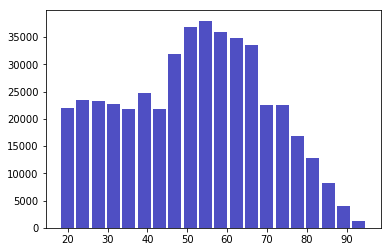

In [8]:
plt.hist(x=df['age'].dropna(), bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([11198.,  5389.,  5475.,  6167.,  5973.,  5753.,  5636.,  5886.,
         5804.,  5740., 11749.,  5655.,  5620.,  5421.,  5373.,  5615.,
         5391.,  5452.,  5620.,  5892., 13180.,  7368.,  7187.,  7304.,
         7349.,  7593.,  8143.,  8899.,  9014.,  9180., 18577.,  9474.,
         9448.,  9483.,  9598.,  9047.,  9273.,  8569.,  8985.,  8681.,
        17067.,  9042.,  9788.,  8933.,  7466.,  7387.,  8101.,  7878.,
         6626.,  6104., 11344.,  5047.,  4769.,  4315.,  4070.,  3727.,
         3521.,  3386.,  3178.,  2745.,  4736.,  1906.,  1655.,  1325.,
         1028.,   857.,   718.,   507.,   336.,   460.]),
 array([18. , 19.1, 20.2, 21.3, 22.4, 23.5, 24.6, 25.7, 26.8, 27.9, 29. ,
        30.1, 31.2, 32.3, 33.4, 34.5, 35.6, 36.7, 37.8, 38.9, 40. , 41.1,
        42.2, 43.3, 44.4, 45.5, 46.6, 47.7, 48.8, 49.9, 51. , 52.1, 53.2,
        54.3, 55.4, 56.5, 57.6, 58.7, 59.8, 60.9, 62. , 63.1, 64.2, 65.3,
        66.4, 67.5, 68.6, 69.7, 70.8, 71.9, 73. , 74.1, 75.2, 76.3, 77

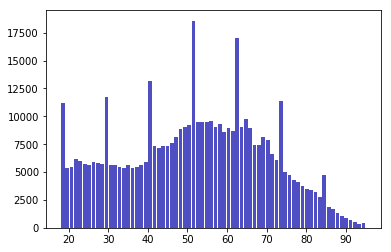

In [9]:
plt.hist(x=df['age'].dropna(), bins=70, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([ 72698., 157629., 126742.,  67338.,  20317.,   9098.,   3826.,
         13933.]),
 array([  6000.,  36500.,  67000.,  97500., 128000., 158500., 189000.,
        219500., 250000.]),
 <a list of 8 Patch objects>)

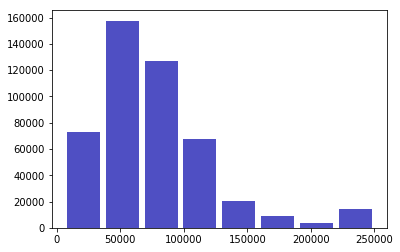

In [10]:
plt.hist(x=df['estimated_income_amount'].dropna(), bins=8, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(array([361633., 118678.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

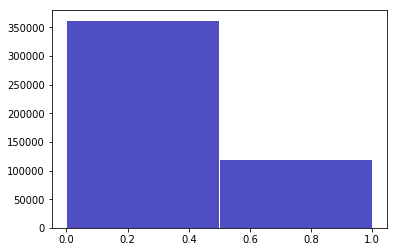

In [11]:
plt.hist(x=df['dwelling_type_null'].dropna(), bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.99)

In [12]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g ~ home_purchase_price + age + land_value + estimated_home_value + estimated_median_income",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())
#Why is estimated home value insignificant?

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               224490
Model:                            GLM   Df Residuals:                   224484
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90864.
Date:                Mon, 04 Mar 2019   Deviance:                   1.8173e+05
Time:                        15:32:51   Pearson chi2:                 2.03e+07
No. Iterations:                     6   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.9091      0.032   -153.012      0.000      -4.972      -4.846
home_purchase

In [13]:
import statsmodels.api as sm
model = sm.formula.glm("voted_18g~hh_upscale_buyer+hh_upscale_male_buyer+hh_upscale_female_buyer+hh_book_buyer+hh_family_magazine+hh_female_oriented_magazine+hh_religious_magazine+hh_gardening_magazine+hh_culinary_interest_magazine+hh_health_fitness_magazine+hh_do_it_yourselfer_magazine+hh_financial_magazine+hh_religious_contributor+hh_political_contributer+hh_donates_environment_cause_u+hh_donates_environment_cause_y+hh_donates_environment_cause_null+hh_donates_to_charity_y+hh_donates_to_charity_u+hh_donates_to_charity_null+hh_presence_of_prem_cred_crd_u+hh_presence_of_prem_cred_crd_y+hh_presence_of_prem_cred_crd_null+hh_computer_owner_y+hh_computer_owner_u+hh_computer_owner_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               225073
Model:                            GLM   Df Residuals:                   225054
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96910.
Date:                Mon, 04 Mar 2019   Deviance:                   1.9382e+05
Time:                        15:34:04   Pearson chi2:                 2.17e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.286e+12   4.67e+11      2.757      0.006    3.72

/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/marzuqkhan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [14]:
model = sm.formula.glm("voted_18g~ethnicity_european+ethnicity_likely_african_american+ethnicity_hispanic_and_portuguese+ethnicity_other+ethnicity_east_and_south_asian+ethnicity_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               459183
Model:                            GLM   Df Residuals:                   459177
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8035e+05
Date:                Mon, 04 Mar 2019   Deviance:                   3.6069e+05
Time:                        15:34:59   Pearson chi2:                 4.54e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.719e+11   8.54e+10      2.012      0.044    4.48

In [15]:
model = sm.formula.glm("voted_18g~religion_protestant+religion_catholic+religion_jewish+religion_christian+religion_eastern_orthodox+religion_buddhist+religion_islamic+religion_hindu+religion_greek_orthodox+religion_shinto+religion_lutheran+religion_mormon+religion_sikh+religion_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               459183
Model:                            GLM   Df Residuals:                   459169
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7814e+05
Date:                Mon, 04 Mar 2019   Deviance:                   3.5627e+05
Time:                        15:35:50   Pearson chi2:                 4.59e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.181e+10   3.72e+10     -0.317      0.751   -8.47e+10    6.11e+10
religio

In [16]:
model = sm.formula.glm("voted_18g~occupation_industry_other+occupation_industry_medical+occupation_industry_management+occupation_industry_clericaloffice+occupation_industry_manufacturing+occupation_industry_financial_services+occupation_industry_skilled_trades+occupation_industry_education+occupation_industry_military+occupation_industry_computer_professional+occupation_industry_legal+occupation_industry_engineering+occupation_industry_civil_servant+occupation_industry_food_services+occupation_industry_other_other+occupation_industry_null",
                       family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              voted_18g   No. Observations:               459183
Model:                            GLM   Df Residuals:                   459166
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8035e+05
Date:                Mon, 04 Mar 2019   Deviance:                   3.6069e+05
Time:                        15:36:18   Pearson chi2:                 4.59e+05
No. Iterations:                     5   Covariance Type:             nonrobust
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -1.7160      0.272     -